In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split

Import Data

In [2]:
def to_onehot(x):
    labels = np.unique(x)
    result = np.zeros(shape=(x.shape[0], labels.shape[0]))

    for i in range(len(x)):
        result[i][x[i]] = 1.0

    return result

In [3]:
X = [] # Features per class
y = [] # Labels
N = 5250 # Amount of data we want to use max: 5250

# Import the features
with open("traindata.txt", "r") as file:
    for line in file.readlines()[:N]:
        features = [float(i) for i in line.split(",")]
        X.append(features)

# Import the labels
with open("trainlabels.txt", "r") as file:
    for line in file.readlines()[:N]:
        label = float(line.rstrip())
        y.append(label)
    
# Convert data to numpy arrays
X = np.array(X)
y = np.array(y, dtype=np.int32)
y_onehot = to_onehot(y)

def split_data(X, y, test_size=0.2, val_size=0.2):
   
    # Splitting the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

    # Further splitting the training data into train and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=val_size / (1 - test_size))

    return X_train, X_val, X_test, y_train, y_val, y_test

X_train, X_val, X_test, y_train, y_val, y_test = split_data(X, y)

Visualize Data

(3150, 31)


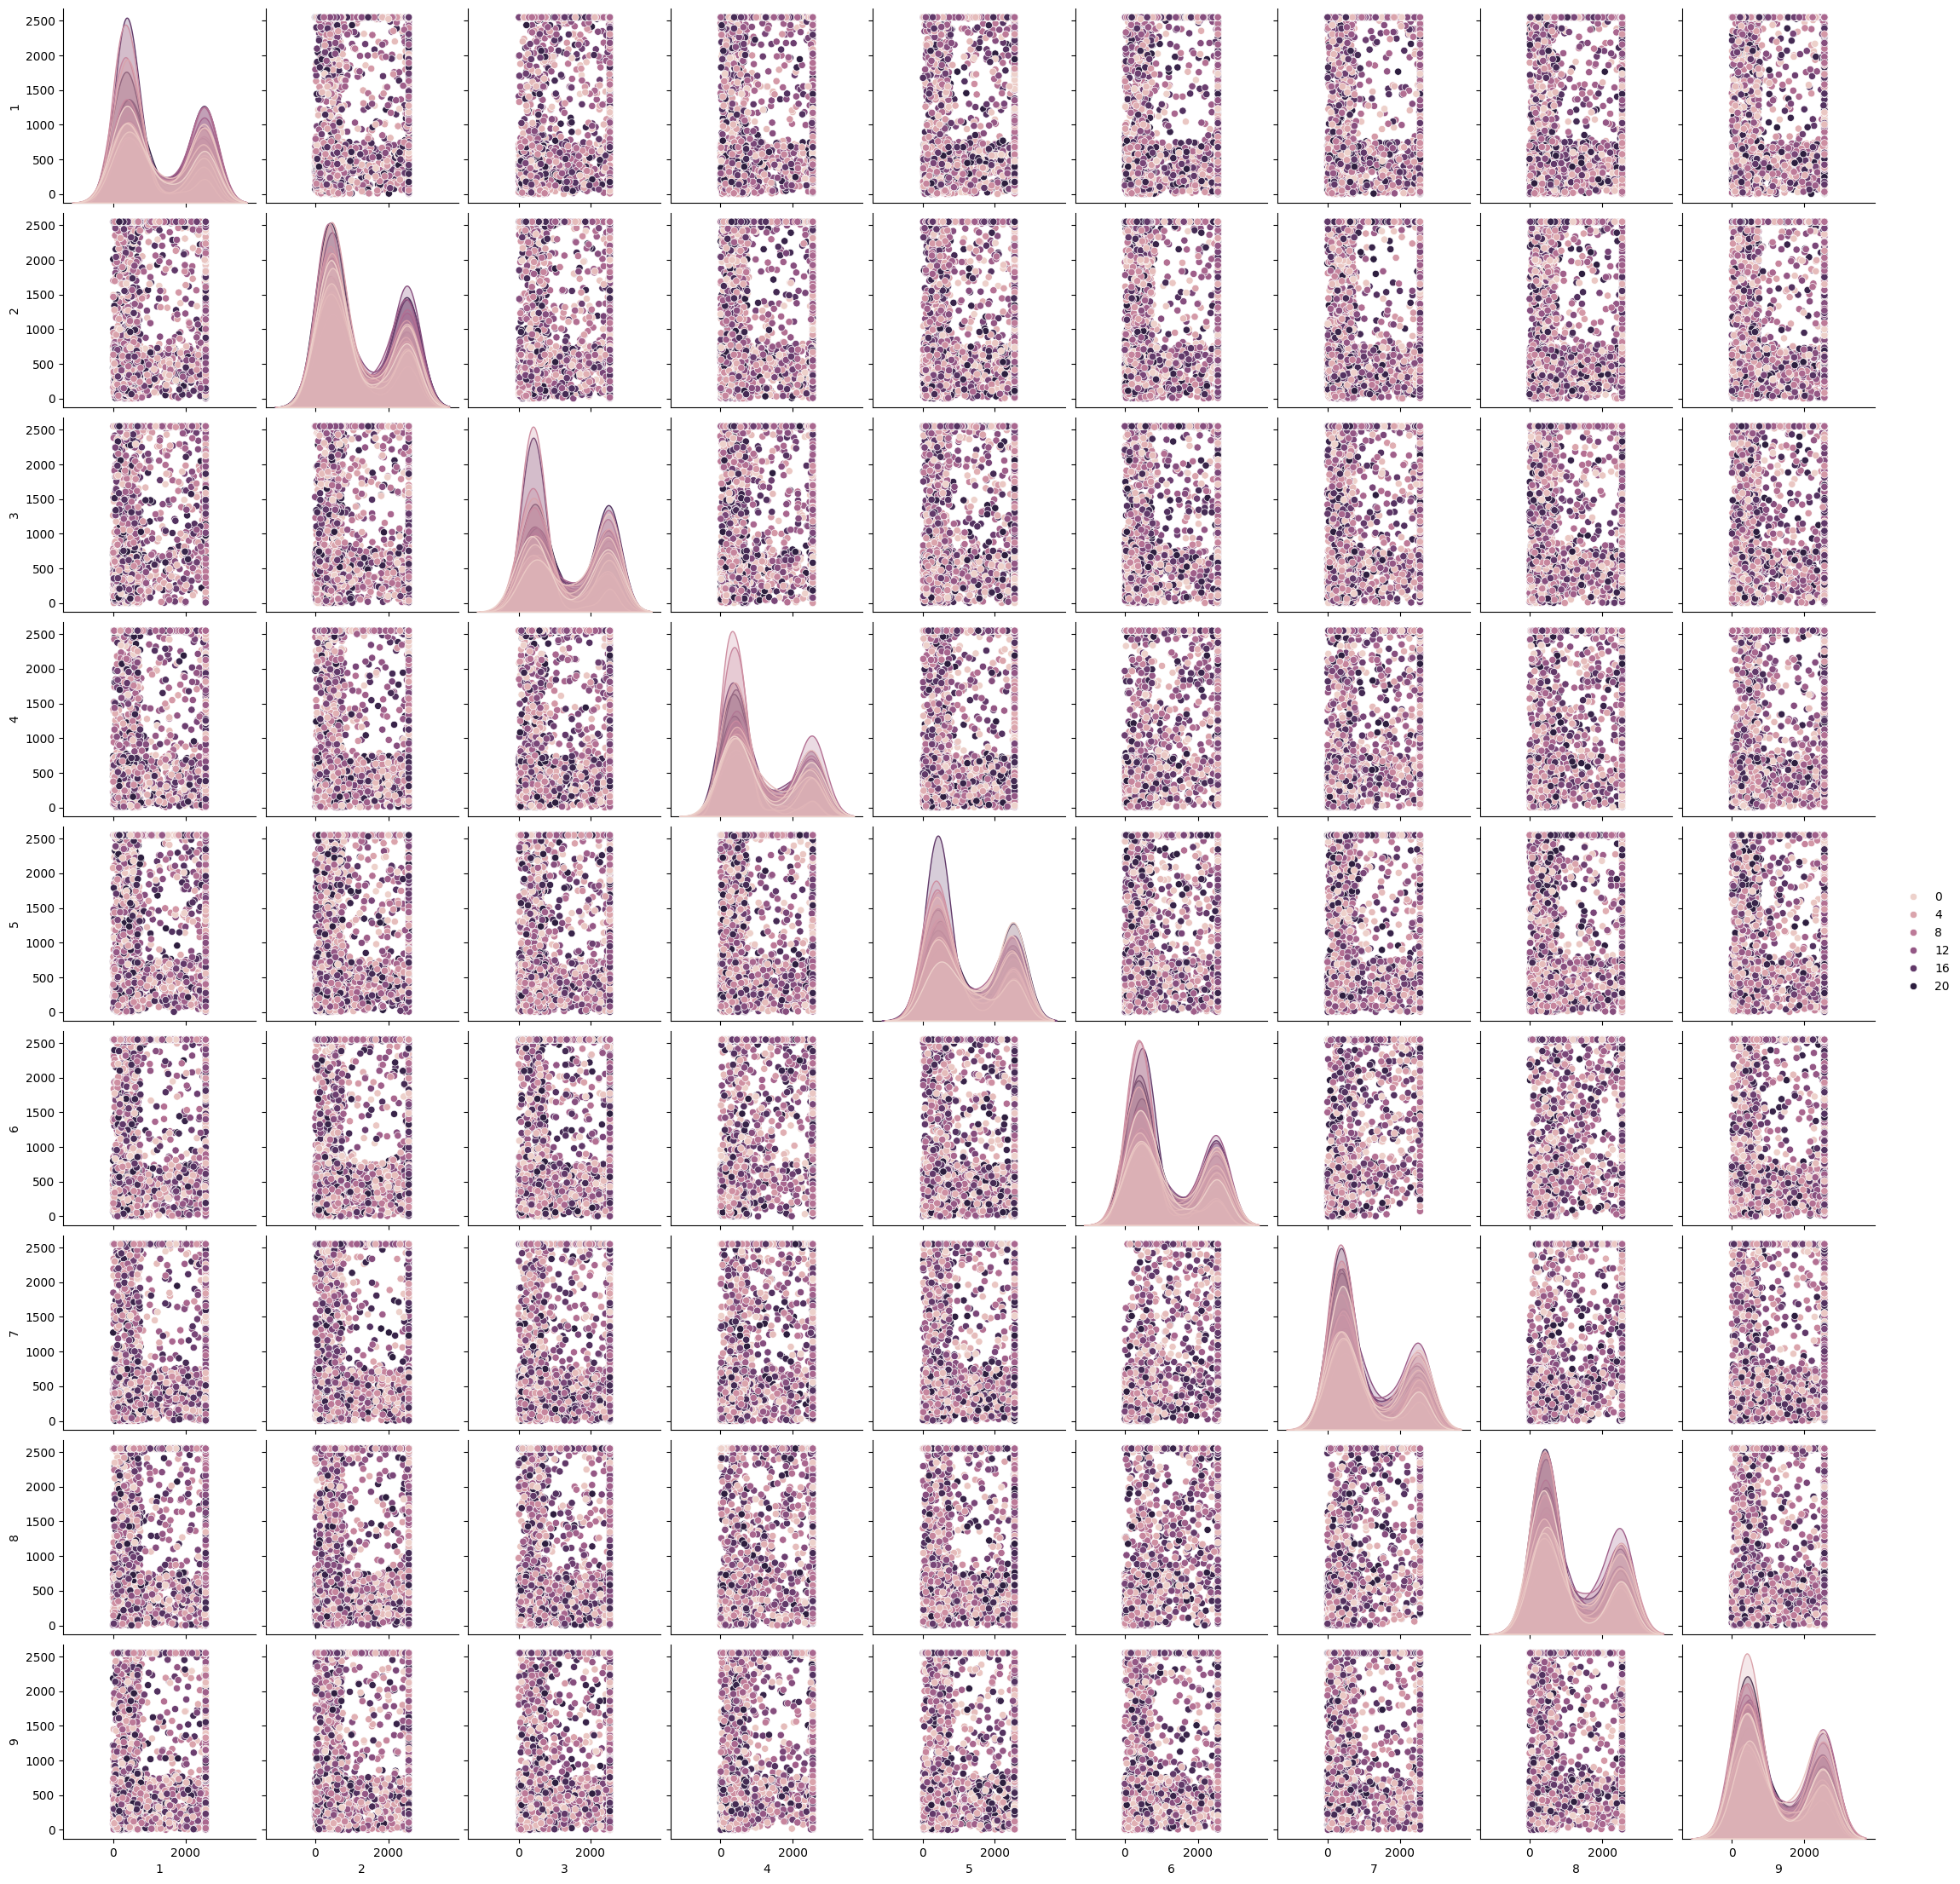

In [4]:
def generate_feature_cover(X, std_tol = 500):
    x_mean = np.mean(X, axis = 0)
    x_std = np.mean(X, axis = 0)
    feature_cover = np.zeros(len(x_mean), dtype = bool)

    for i in range(len(x_mean)):
        if np.abs(x_std[i]) > std_tol:
            feature_cover[i] = True    

    return feature_cover

feature_cover = generate_feature_cover(X_train, 0)
combined_data = np.hstack((np.transpose([y_train]), X_train[:, feature_cover]))
print(np.shape(combined_data))
df = pd.DataFrame(combined_data[:, 0:10])
sns.pairplot(df, hue=0)

In [ ]:
feature_cover = generate_feature_cover(X_train, 1000)
combined_data = np.hstack((np.transpose([y_train]), X_train[:, feature_cover]))
print(np.shape(combined_data))
df = pd.DataFrame(combined_data[:, 0:10])
sns.pairplot(df, hue=0)